In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from loaders.ultrasound_dataset import USDataset

from torchvision import transforms

import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import SimpleITK as sitk
import numpy as np

import pickle

/work/jprieto/install/anaconda3/envs/us/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
mount_point = '/work/jprieto/data/remote/GWH/Groups/FAMLI/Shared/C1_ML_Analysis'

csv_path = os.path.join(mount_point, './test_output/contrastive_learning/extract_frames_blind_sweeps_c1_30082022_wscores_1e-4_rr_pad_rc/epoch=27-val_loss=62.95/extract_frames_blind_sweeps_c1_30082022_wscores_voluson_st_test_sample.csv')

test_df = pd.read_csv(csv_path)
features_path = csv_path.replace(".csv", ".pickle")
centers_path = features_path.replace(".pickle", "_centers.pickle")

with open(features_path, 'rb') as f:
    features = pickle.load(f)
    
with open(centers_path, 'rb') as f:
    centers = pickle.load(f)
    

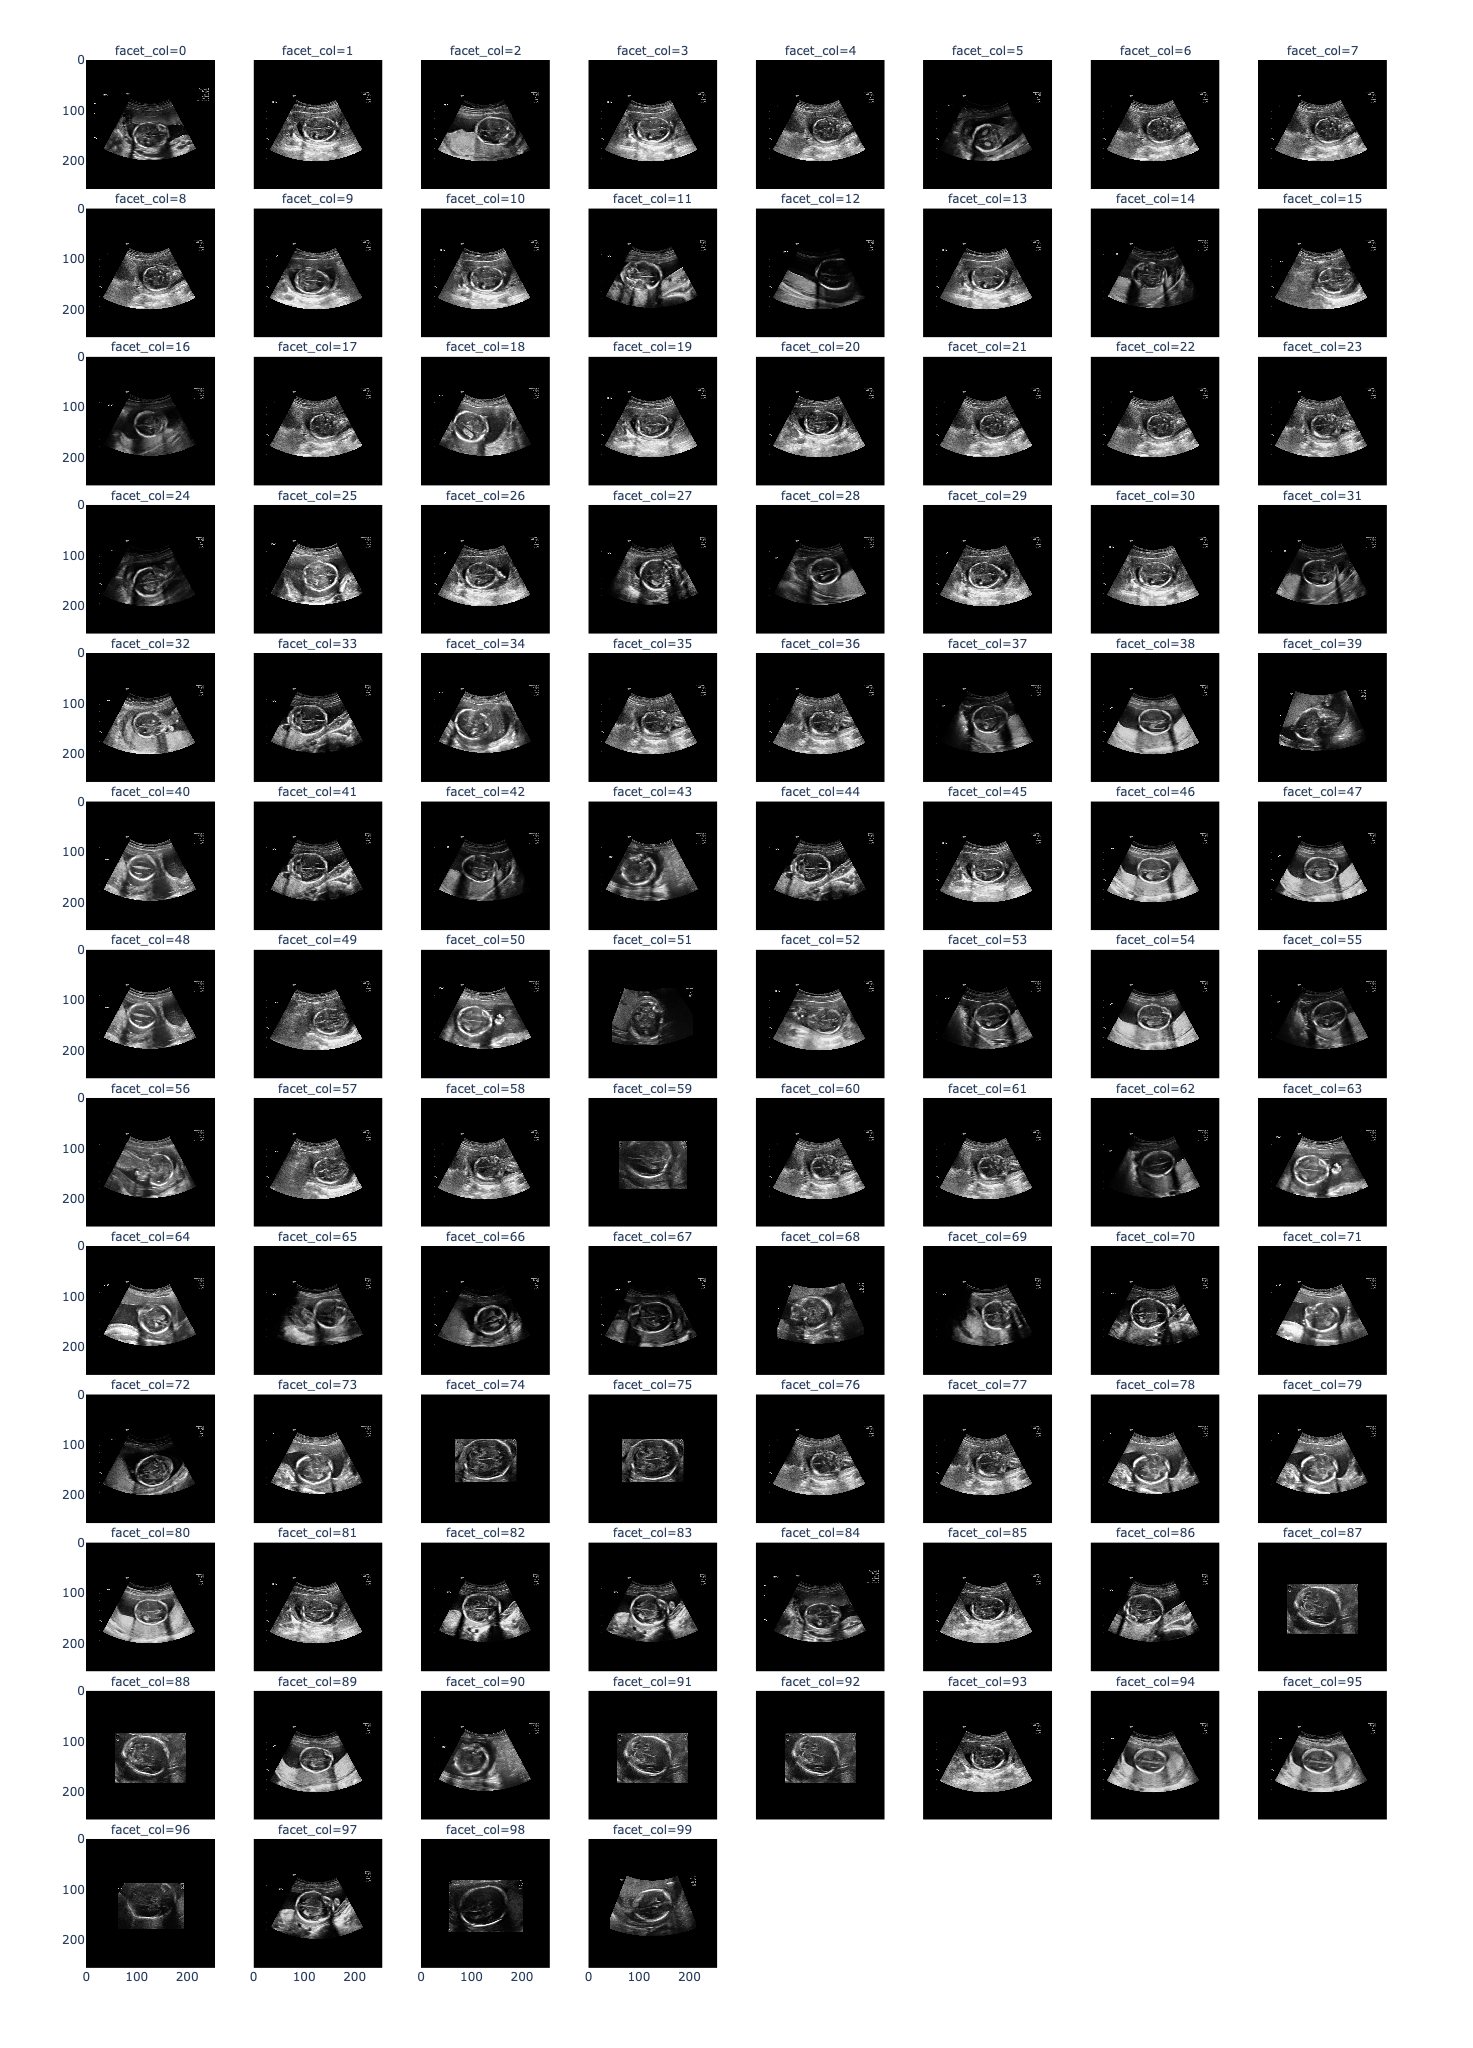

In [36]:
distance = np.linalg.norm(np.power(features - centers[0], 2), axis=1)
sorted_index = np.argsort(d)[0:100]

img = []    
for i in sorted_index:
    img_path = test_df.loc[i]["img_path"]    
    img_path = os.path.join(mount_point, img_path)
    img.append(sitk.GetArrayFromImage(sitk.ReadImage(img_path)))
img = np.array(img)    
fig = px.imshow(img, facet_col=0, binary_string=True, facet_col_wrap=8, facet_row_spacing=0.01, height=2048)        

fig